### Google Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/workspace/datarea/jupyter/lotto

/content/drive/MyDrive/workspace/datarea/jupyter/lotto


## 로또 데이터 확인

**로또 번호 스키마**
- drwNo:           [회차번호]
- returnValue:     "success" or "fail"
- drwNoDate:       [날짜]
- totSellamnt:     [누적 상금]
- firstAccumamnt:  [총 1등 당첨금]
- firstPrzwnerCo:  [1등 인원수]
- firstWinamnt:    [1등 수령액]
- drwtNo1:         [1번 번호]
- drwtNo2:         [2번 번호]
- drwtNo3:         [3번 번호]
- drwtNo4:         [4번 번호]
- drwtNo5:         [5번 번호]
- drwtNo6:         [6번 번호]
- bnusNo:          [보너스 번호]

In [3]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

lotto_df = pd.read_csv("./data/lotto.tsv", sep="\t")
lotto_df["drwNoDate"] = pd.to_datetime(lotto_df["drwNoDate"])
lotto_df

,drwNo,returnValue,drwNoDate,totSellamnt,firstAccumamnt,firstPrzwnerCo,firstWinamnt,drwtNo1,drwtNo2,drwtNo3,drwtNo4,drwtNo5,drwtNo6,bnusNo
0,1,success,2002-12-07,3681782000,863604600,0,0,10,23,29,33,37,40,16
1,2,success,2002-12-14,4904274000,0,1,2002006800,9,13,21,25,32,42,2
2,3,success,2002-12-21,4729342000,0,1,2000000000,11,16,19,21,27,31,30
3,4,success,2002-12-28,5271464000,1267147200,0,0,14,27,30,31,40,42,2
4,5,success,2003-01-04,6277102000,3041094900,0,0,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1077,success,2023-07-22,105927489000,24996307126,7,3570901018,4,8,17,30,40,43,34
1077,1078,success,2023-07-29,105407618000,25699259256,12,2141604938,6,10,11,14,36,38,43
1078,1079,success,2023-08-05,103120206000,24410964753,9,2712329417,4,8,18,24,37,45,6
1079,1080,success,2023-08-12,104111986000,25476111003,7,3639444429,13,16,23,31,36,44,38


## 날짜별 1등 당첨자 수

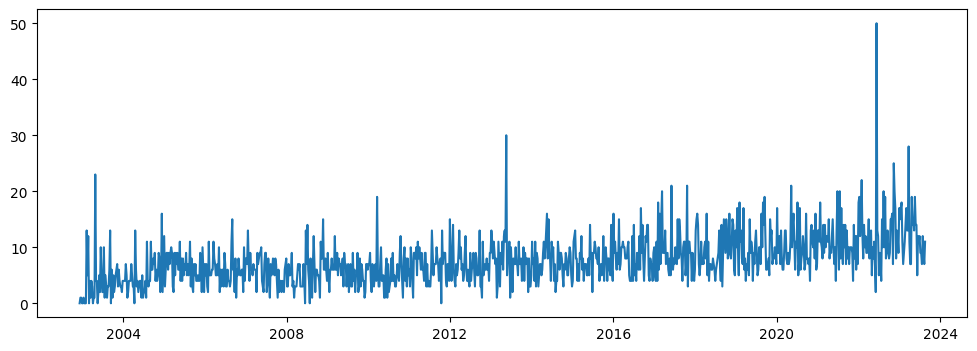

In [4]:
# 전체 기간
plt.figure(figsize=(12, 4))

plt.plot(lotto_df["drwNoDate"], lotto_df["firstPrzwnerCo"])
plt.show()

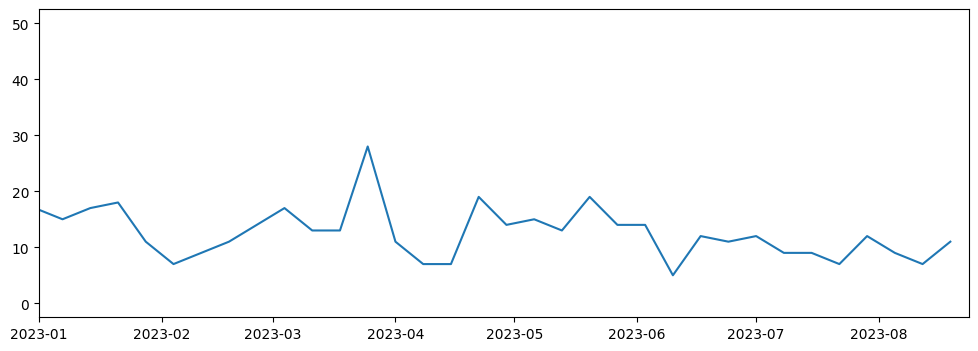

In [5]:
# 23년도 부터 현재까지
plt.figure(figsize=(12, 4))
plt.xlim([datetime.datetime(2023, 1, 1), datetime.datetime.today()])

plt.plot(lotto_df["drwNoDate"], lotto_df["firstPrzwnerCo"])
plt.show()

## 번호별 빈도 수

In [6]:
# 번호 dict 생성
MIN_LOTTO_NUM, MAX_LOTTO_NUM = 1, 45
MIN_LOTTO_NO,  MAX_LOTTO_NO  = 1, 6

num_dict = {num : 0 for num in range(MIN_LOTTO_NUM, MAX_LOTTO_NUM+1)}

for idx, row in lotto_df.iterrows():
  for n in range(MIN_LOTTO_NO, MAX_LOTTO_NO+1):
    num_dict[row["drwtNo" + str(n)]] += 1

# print(num_dict)

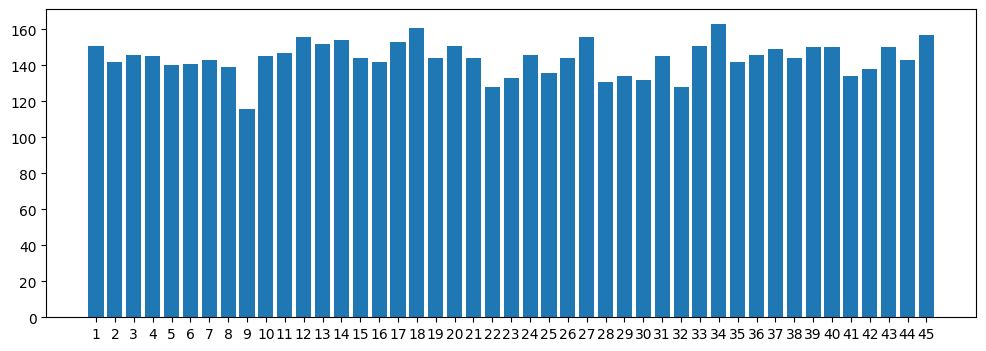

In [7]:
# 전체
plt.figure(figsize=(12, 4))
plt.xticks(list(num_dict.keys()))

plt.bar(num_dict.keys(), num_dict.values())
plt.show()

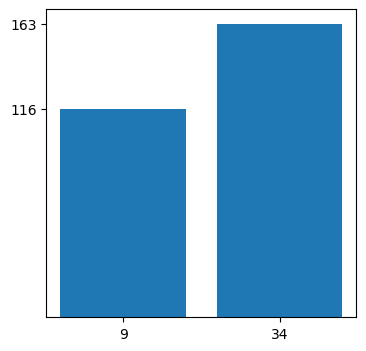

In [8]:
# 최대/최소
max_k_v_list = [(k, v) for k, v in num_dict.items() if max(num_dict.values()) == v]
min_k_v_list = [(k, v) for k, v in num_dict.items() if min(num_dict.values()) == v]
x_list, y_list = [], []
for max_k_v, min_k_v in zip(max_k_v_list, min_k_v_list):
  x_list.append(str(max_k_v[0]))
  y_list.append(max_k_v[1])
  x_list.insert(0, str(min_k_v[0]))
  y_list.insert(0, min_k_v[1])

plt.figure(figsize=(4, 4))
plt.yticks(y_list)

plt.bar(x_list, y_list)
plt.show()